In [0]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer


#Step 1: Gather Data
###Data 1: Twitter Archive Enhanced (Local file)

In [70]:
#read data file
twitter_archive= pd.read_csv("twitter-archive-enhanced.csv")

#Inspect few first 5 rows
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


###Data 2: Image Predictions (URL)

In [0]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [72]:
#Inspect few first 5 rows
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


###Data 3: Tweets (API)

In [0]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [74]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [0]:
# Save only certain tweet elements in dataframe
elements_to_save = ['id', 'favorite_count', 'retweet_count']
# Later convert list to dataframe
data = []

with open('tweet-json.json', 'r') as readfile: 
    # Read in JSON line and convert to dict
    tweet_json = readfile.readline()
    
    # Read line by line into DataFrame
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        # Create a smaller dict
        data_row = dict((k, tweet_dict[k]) for k in elements_to_save)
        data.append(data_row)
        
        # Read in JSON line and convert to dict
        tweet_json = readfile.readline()
        
df_tweet_info = pd.DataFrame.from_dict(data)

In [76]:
#Inspect few first 5 rows
df_tweet_info.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


Now we have gathered all the data from 3 different sources:

1- Data from an existing file (**twitter-archive-enhanced.csv**): Read csv file using pandas (WeRateDogs Twitter archive). 

2- Downloaded a file programmatically using the Requests library and the URL: (**image-predictions.tsv**) The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. 

3- Queried the Twitter API for each tweet's JSON data using Python's Tweepy library and stored each tweet's entire set of JSON data in a file called **tweet-json.txt** file.


#Step 2: Assess Data

We will assess data using 2 different approaches: Visually and Programmatically

###**Twitter archive**

####Visually

In [77]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [78]:
#Take a random sample of 10 
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1738,679527802031484928,NaN,NaN,2015-12-23 05:03:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This little pupper just arrived. 11/10 would s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679527802...,11,10,None,None,None,pupper,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
479,815745968457060357,NaN,NaN,2017-01-02 02:26:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Levi. He's a Madag...,7.914070e+17,4.196984e+09,2016-10-26 22:31:36 +0000,https://twitter.com/dog_rates/status/791406955...,12,10,Levi,None,None,None,None
2065,671151324042559489,NaN,NaN,2015-11-30 02:18:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*struggling to breathe properly* 12/10 https:/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671151324...,12,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
263,842535590457499648,NaN,NaN,2017-03-17 00:38:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winnie. She lost her body saving a chi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/842535590...,13,10,Winnie,None,None,None,None
1958,673580926094458881,NaN,NaN,2015-12-06 19:13:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you ask your professor about extra credit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673580926...,8,10,None,None,None,None,None
1747,679111216690831360,NaN,NaN,2015-12-22 01:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is officially the greatest yawn of all ti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679111216...,12,10,officially,None,None,None,None
1535,689977555533848577,NaN,NaN,2016-01-21 01:07:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a pup wearing a beret. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689977555...,12,10,None,None,None,None,None
1392,700062718104104960,NaN,NaN,2016-02-17 21:02:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eazy-E. He's colorful af. Must be rare...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700062718...,6,10,Eazy,None,None,None,None


In several columns null objects are non-null (None instead of NaN).

Source column has the HTML tags 

###Programmatically

In [79]:
#Inspect columns' data types and null values
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

'retweeted_status_timestamp' and 'timestamp' should be datetime instead of object(string).

'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' should be integers/strings instead of float.

Missing values in 'expanded_urls'

'tweet_id' should be string not int

In [80]:
# View descriptive statistics of twitter_archive
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [81]:
#Different values in name column
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Grey         1
Eazy         1
Kaiya        1
Tug          1
Zuzu         1
Name: name, Length: 957, dtype: int64

some names are not actual names

In [82]:
#Different values in puppo column
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [83]:
#Different values in rating_numerator column
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [84]:
#Different values in rating_denominator column
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

rating_denominator should be a standard 10, but there are a multitude of other values which must be errors

###**Image predictions**

####Visually

In [85]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


p1, p2, p3 columns have inconsistent capitalization 

The underscores visible in the predictions columns make the data look a little untidy and underprepared.

On visually assessing this table, I can see that some of the predictions in the p1 column aren't breeds of dogs but other animals or non-living things and on checking out the corresponding image urls on a browser myself, I found out that a lot of these images didn't have any dogs in them. Thus such tweets are invalid.

In [86]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
208,669970042633789440,https://pbs.twimg.com/media/CUw2MV4XIAAHLO_.jpg,1,miniature_pinscher,0.734744,True,Rottweiler,0.131066,True,Doberman,0.081509,True
667,682962037429899265,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False
1401,768855141948723200,https://pbs.twimg.com/media/CquFrCKWAAAr32m.jpg,1,chow,0.720219,True,Brabancon_griffon,0.058365,True,Rottweiler,0.055114,True
1459,778027034220126208,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
606,679877062409191424,https://pbs.twimg.com/media/CW9olDsUsAA0XSf.jpg,1,hog,0.809466,False,hay,0.060178,False,lumbermill,0.016483,False
887,699072405256409088,https://pbs.twimg.com/ext_tw_video_thumb/69907...,1,Shih-Tzu,0.599587,True,Pekinese,0.213069,True,Maltese_dog,0.154293,True
1899,851224888060895234,https://pbs.twimg.com/media/C9AohFoWsAUmxDs.jpg,3,car_mirror,0.971512,False,seat_belt,0.007063,False,standard_poodle,0.005683,True
1572,795076730285391872,https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg,2,gas_pump,0.676439,False,harvester,0.049995,False,swing,0.044660,False
1750,823939628516474880,https://pbs.twimg.com/media/C284uD8WgAEmMVn.jpg,1,schipperke,0.234076,True,curly-coated_retriever,0.193093,True,Labrador_retriever,0.095197,True
1979,870804317367881728,https://pbs.twimg.com/media/DBW35ZsVoAEWZUU.jpg,1,home_theater,0.168290,False,sandbar,0.098040,False,television,0.079729,False


In [87]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


tweet_id should be string rather than int.

In [88]:
image_prediction.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pole                    1
lynx                    1
lion                    1
traffic_light           1
fire_engine             1
Name: p1, Length: 378, dtype: int64

In [89]:
image_prediction.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
rain_barrel             1
lesser_panda            1
umbrella                1
desk                    1
mashed_potato           1
Name: p2, Length: 405, dtype: int64

The predictions for tweets have been other animals or things.

###**Tweets**

####Visually

In [90]:
df_tweet_info

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [91]:
df_tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


id should be String

In [92]:
df_tweet_info.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [93]:
df_tweet_info.duplicated().sum()

0

**Assess**
Following issues have been assessed:

1- Quality

2- Tidiness 

##Quality Issues:

The four main data quality dimensions are:

Completeness: Missing data

Validity: does the data make sense

Accuracy: inaccurate data

Consistency: standardization

**twitter_archive:**

In several columns null objects are non-null (None instead of NaN).

Source column has the HTML tags 

tweet_id is int but should be string

'retweeted_status_timestamp' and 'timestamp' should be datetime instead of object(string).

'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' should be integers/strings instead of float.

Missing values in 'expanded_urls'

'tweet_id' should be string not int

some names are not actual names

retweets not required

rating_numerator and rating_denominator has values that are not correctly extracted and some tweet texts have more than 1 fractional values for ratings.

**image_predictions:**

p1, p2, p3 columns have inconsistent capitalization 

The underscores visible in the predictions columns make the data look a little untidy and underprepared.

On visually assessing this table, I can see that some of the predictions in the p1 column aren't breeds of dogs but other animals or non-living things and on checking out the corresponding image urls on a browser myself, I found out that a lot of these images didn't have any dogs in them. Thus such tweets are invalid.

tweet_id should be string rather than int.


**tweets:**

Incorrect datatype of id: should be string

##Tidiness Issues


Three requirements for tidiness:

Each variable forms a column

Each observation forms a row

Each type of observational unit forms a table

**twitter_archive**

Dog "stage" variable in four columns: doggo, floofer, pupper, puppo and some tweets contain more than one dog stage

**image_predictions**

Three data frames df_twitter_archive, df_image_predictions, and df_tweet_info should be one (combined table) since all tables' entries are each describing one tweet, So join 'tweet_info' and 'image_predictions' to 'twitter_archive'



#Step 3: Clean Data

Fix the quality and tidiness issues that we identified in the assess step.

For each problem, we will:

Define 

Code

Test 





In [0]:
#copy dataframes
tweet_data_clean = df_tweet_info.copy()
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean= image_prediction.copy()

#Twitter archives table

###Problem 1:
**Define**

Remove all the retweets by removing all the rows with non null values in retweeted_status_id.

**Code**

In [0]:
#subsetting the table over all the rows having null values in the retweeted_status_id column
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

**Test**

In [96]:
twitter_archive_clean[twitter_archive_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


###Problem 2:

**Define**

Drop the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns.

**Code**

In [0]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                                                      'retweeted_status_id', 'retweeted_status_user_id',
                                                      'retweeted_status_timestamp'], axis = 1)

**Test**

In [98]:
twitter_archive_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


###Problem 3:

**Define**

Make the source column readable by replacing the urls in it by the source name 

**Code**

In [99]:
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [0]:
#the source column has only 3 different values, thus assigning each value to a different variable  
a = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
b = '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
c = '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'

In [0]:
#using the variables created above in the replace function 
twitter_archive_clean.source = twitter_archive_clean.source.replace(a, 'Twitter for iPhone')
twitter_archive_clean.source = twitter_archive_clean.source.replace(b, 'Twitter Web Client')
twitter_archive_clean.source = twitter_archive_clean.source.replace(c, 'TweetDeck')

**Test**

In [102]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone                                                 2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>      91
Twitter Web Client                                                   31
TweetDeck                                                            11
Name: source, dtype: int64

###Problem 4:

**Define**

Melt the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column 'dog_stage' and handle tweets that contain more than one dog stage

**Code**

In [0]:
# handle none
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)

# merge into column
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

# handle multiple stages
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == '', 'dog_stage'] = np.nan

**Test**

In [104]:
print(twitter_archive_clean.dog_stage.value_counts())
twitter_archive_clean.info()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
 12  dog_stage           344 non-null

###Problem 5:

**Define**

Fix rating numerator and denominators that are not actually ratings and correctly extracted

**Code**

In [105]:
import re
# View all occurences where there are more than one #/# in 'text' column
text_ratings_to_fix = twitter_archive_clean[twitter_archive_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [106]:
text_ratings_to_fix

55      @roushfenway These are good dogs but 17/10 is ...
313     @jonnysun @Lin_Manuel ok jomny I know you're e...
766     "Yep... just as I suspected. You're not flossi...
1007    This is Bookstore and Seaweed. Bookstore is ti...
1068    After so many requests, this is Bretagne. She ...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1222    Meet Travis and Flurp. Travis is pretty chill ...
1359    This is Socks. That water pup w the super legs...
1459    This may be the greatest video I've ever been ...
1465    Meet Oliviér. He takes killer selfies. Has a d...
1508    When bae says they can't go out but you see th...
1525    This is Eriq. His friend just reminded him of ...
1538    Meet Fynn &amp; Taco. Fynn is an all-powerful ...
1662    This is Darrel. He just robbed a 7/11 and is i...
1795    Meet Tassy &amp; Bee. Tassy is pretty chill, b...
1832    These two pups just met and have instantly bon...
1897    Meet R

In [0]:
for entry in text_ratings_to_fix:
    mask = twitter_archive_clean.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    twitter_archive_clean.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)

In [0]:
#Fix rating values that are not correctly extracted
rating = twitter_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']

**Test**

In [109]:
twitter_archive_clean.rating_numerator


0       13
1       13
2       12
3       13
4       12
        ..
2351     5
2352     6
2353     9
2354     7
2355     8
Name: rating_numerator, Length: 2175, dtype: object

###Problem 6:

**Define**

Add missing expanded_urls

**Code**

In [0]:
# If expanded_urls is null, add by using tweet id
def add_urls(row):
    # Don't do anything if expanded_urls is not null
    if pd.notnull(row['expanded_urls']):
        return row
    else:
        # Get tweet_id
        tweet_id = row['tweet_id']
        # Make new URL and save into expanded_urls
        row['expanded_urls'] = 'https://twitter.com/dog_rates/status/{}'.format(tweet_id)
        # return updated row
        return row

# Save dataframe with missing urls
twitter_archive_clean = twitter_archive_clean.apply(add_urls, axis=1)

**Test**

In [111]:
# Check that there are no empty expanded_urls
twitter_archive_clean[twitter_archive_clean['expanded_urls'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage


###Problem 7:

**Define**

Change datatypes .

**Code**

In [0]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category')
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

**Test**

In [113]:
twitter_archive_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                           category
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                float64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dog_stage                        category
dtype: object

#Image Predictions

###Problem 8: 

**Define**

Change tweet_id column's datatype from int to string.


**Code**

In [0]:
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)

**Test**

In [115]:
image_predictions_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

###Problem 9: 

**Define**

Replace the underscores in the p1, p2 and p3 columns by spaces.

**Code**

In [0]:
#replacing using the replace function
image_predictions_clean.p1 = image_predictions_clean.p1.str.replace('_',' ')
image_predictions_clean.p2 = image_predictions_clean.p2.str.replace('_',' ')
image_predictions_clean.p3 = image_predictions_clean.p3.str.replace('_',' ')

**Test**

In [117]:
image_predictions_clean[['p1', 'p2', 'p3']]

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman
...,...,...,...
2070,basset,English springer,German short-haired pointer
2071,paper towel,Labrador retriever,spatula
2072,Chihuahua,malamute,kelpie
2073,Chihuahua,Pekinese,papillon


###Problem 10: 

**Define**

Lowercase every word in the columns p1, p2 and p3.

**Code**

In [0]:
#lowercasing by using the str.lower function
image_predictions_clean.p1 = image_predictions_clean.p1.str.lower()
image_predictions_clean.p2 = image_predictions_clean.p2.str.lower()
image_predictions_clean.p3 = image_predictions_clean.p3.str.lower()

**Test**

In [119]:
image_predictions_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese mountain dog,0.651137,True,english springer,0.263788,True,greater swiss mountain dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box turtle,0.933012,False,mud turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan mastiff,0.058279,True,fur coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping cart,0.962465,False,shopping basket,0.014594,False,golden retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature poodle,0.201493,True,komondor,0.192305,True,soft-coated wheaten terrier,0.082086,True


#Tweet counts table

###Problem 11:

**Define**

Change tweet_id column's datatype from int to object.

**Code**

In [0]:
tweet_data_clean.id = tweet_data_clean.id.astype(str)

**Test**

In [121]:
tweet_data_clean.dtypes

id                object
favorite_count     int64
retweet_count      int64
dtype: object

###Problem 12:

**Define**

Add tweet_info and image_predictions to twitter_archive table

**Code**

In [0]:
twitter_archive_clean = pd.merge(left=twitter_archive_clean,
                                 right=tweet_data_clean, left_on='tweet_id', right_on='id', how='inner')

In [0]:
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean, on='tweet_id', how='inner')


**Test**

In [124]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   category           
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   float64            
 6   rating_denominator  1994 non-null   float64            
 7   name                1994 non-null   object             
 8   doggo               1994 non-null   object             
 9   floofer             1994 non-null   object             
 10  pupper              1994 non-null   object             
 11  puppo               1994 non-null   object             
 12  dog_stage           306 non-null  

#Problem 13:

**Define**

Creating a new dog_breed column using the image prediction data

In [0]:
twitter_archive_clean['dog_breed'] = 'None'

for i, row in twitter_archive_clean.iterrows():

    if row.p1_dog:
        twitter_archive_clean.at[i, 'dog_breed']= row.p1
    elif row.p2_dog and row.rating_numerator >= 10:
        twitter_archive_clean.at[i, 'dog_breed']= row.p2
    elif row.p3_dog and row.rating_numerator >= 10:
       twitter_archive_clean.at[i, 'dog_breed']= row.p3
    else:
        twitter_archive_clean.at[i, 'dog_breed']= 'None'

In [126]:
twitter_archive_clean.dog_breed.value_counts()

None                    365
golden retriever        156
labrador retriever      107
pembroke                 94
chihuahua                86
                       ... 
japanese spaniel          1
clumber                   1
bouvier des flandres      1
silky terrier             1
irish wolfhound           1
Name: dog_breed, Length: 114, dtype: int64

In [127]:
twitter_archive_clean.drop(['p1', 'p1_conf','p1_dog','p2', 'p2_conf','p2_dog','p3', 'p3_conf','p3_dog','img_num'], axis=1,inplace=True);
twitter_archive_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,id,favorite_count,retweet_count,jpg_url,dog_breed
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,,,,NaN,892420643555336193,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,,,,NaN,892177421306343426,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,,,,NaN,891815181378084864,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua


#Problem 14: 

**Define**

Correct dog names that are not real names

**Code**

In [0]:
twitter_archive_clean.name = twitter_archive_clean.name.str.replace('^[a-z]+', 'None')

**Test**

In [129]:
twitter_archive_clean['name'].value_counts()

None       644
Charlie     11
Lucy        10
Cooper      10
Oliver      10
          ... 
Brandi       1
Obi          1
Julius       1
Adele        1
Gidget       1
Name: name, Length: 914, dtype: int64

###**Storing**

Store the final cleaned datasets to csv files.

In [0]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index = False)
image_predictions_clean.to_csv('image_predicitons_clean.csv', index = False)
tweet_data_clean.to_csv('tweet_counts_clean.csv', index = False)

#Step 4: Analysis and Visualization

In [0]:
#reading the cleaned twitter archives csv file for analysis
twitter_data = pd.read_csv('twitter_archive_master.csv', encoding = 'utf-8')

In [132]:
twitter_data

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,id,favorite_count,retweet_count,jpg_url,dog_breed
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,NaN,892420643555336193,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,NaN,NaN,NaN,NaN,892177421306343426,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,NaN,NaN,NaN,891815181378084864,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,NaN,NaN,NaN,NaN,891689557279858688,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,labrador retriever
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,NaN,NaN,NaN,NaN,891327558926688256,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,NaN,NaN,NaN,NaN,NaN,666049248165822465,111,41,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher
1990,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,None,NaN,NaN,NaN,NaN,NaN,666044226329800704,311,147,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian ridgeback
1991,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,None,NaN,NaN,NaN,NaN,NaN,666033412701032449,128,47,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german shepherd
1992,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,None,NaN,NaN,NaN,NaN,NaN,666029285002620928,132,48,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone


###1- Visualizing the retweet counts, and favorite counts comparison over time.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


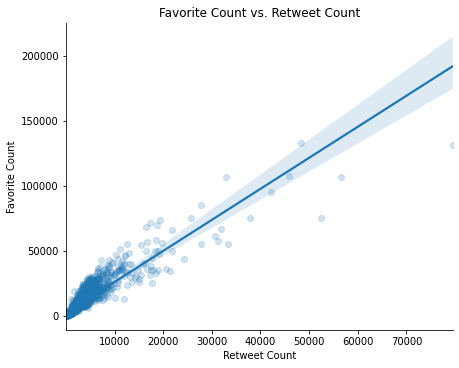

In [133]:
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Scatterplot of retweets vs favorite count

sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=twitter_data,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5});

plt.title('Favorite Count vs. Retweet Count');
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');


Favorite counts are correlated with retweet counts - this is a positive correlation.

###2- Visualizing the most popular dog breed

In [134]:
twitter_data['dog_breed'].value_counts()

None                    365
golden retriever        156
labrador retriever      107
pembroke                 94
chihuahua                86
                       ... 
japanese spaniel          1
clumber                   1
bouvier des flandres      1
silky terrier             1
irish wolfhound           1
Name: dog_breed, Length: 114, dtype: int64

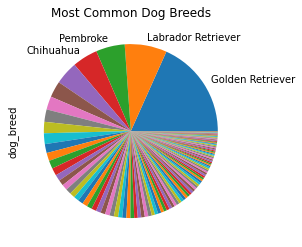

In [135]:
#creating an empty array named labels with the same length as the number of values in the prediction column
labels = np.full(len(twitter_data.dog_breed.value_counts()), '', dtype = object)
labels[0] = 'Golden Retriever'
labels[1] = 'Labrador Retriever'
labels[2] = 'Pembroke'
labels[3] = 'Chihuahua'
twitter_data.dog_breed.value_counts().plot(kind = 'pie', labels = labels)
plt.title('Most Common Dog Breeds');

Ignoring the None label, the most popular dog breed is a golden retriever,then labrador retriever,then Pembroke and then Chihuahua. 

These together account for more than 25% of the tweets.

###3- Visualizing the most popular dog name

In [136]:
twitter_data.name.value_counts()

None       644
Charlie     11
Lucy        10
Cooper      10
Oliver      10
          ... 
Brandi       1
Obi          1
Julius       1
Adele        1
Gidget       1
Name: name, Length: 914, dtype: int64

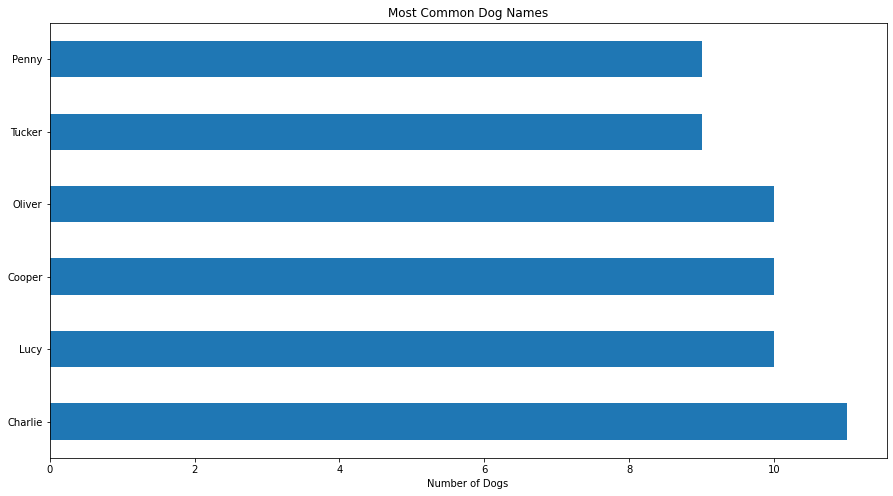

In [137]:
twitter_data.name.value_counts()[1:7].plot(kind='barh', figsize=(15,8), title='Most Common Dog Names').set_xlabel("Number of Dogs");

The most popular dog names are Charlie and then Oliver, Cooper and Lucy for a tie at 10 each.